# 개요 및 필요한 라이브러리

이 장은 인공 신경망의 초창기 구조를 간단히 소개하고, 요즘 많이 사용하는 다층 퍼셉트론을 설명한다. 이어서 인기가 높은 케라스 api를 사용하여 인공 신경망을 구현하는 방법을 알아본다.

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 10.1 뉴런에 관해서

생물학적 뉴런은 활동 전위 또는 간단히 신호 라고 부르는 짧은 전기 자극을 만든다. 이 신호는 축삭 돌기를 따라 이동하여 시냅스가 신경전달물질 이라는 화학적 신호를 발생하게 한다. 

생물학적 뉴런 하나는 아주 단순하게 동작하지만, 보통은 수십억 개로 구성된 거대한 네트워크로 조직되며, 이는 보통 다른 뉴런 네트워크 수천 개와 연결된다.

### 메컬리와 피츠가 제안한 매우 단순한 신경망 모델

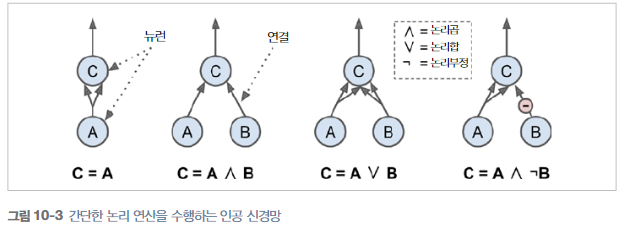

### MLP

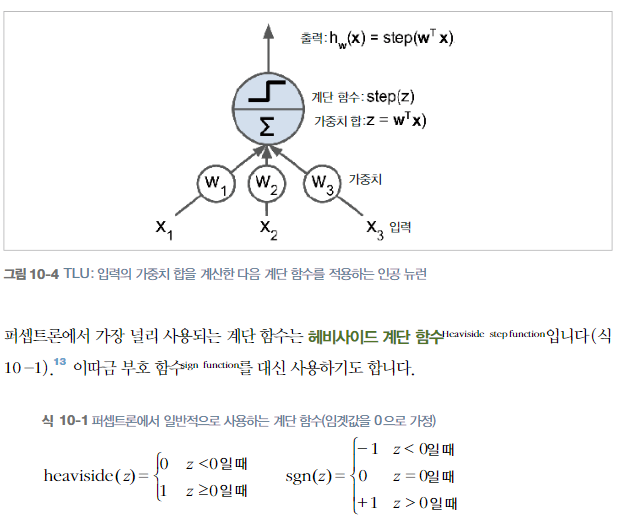

퍼셉트론은 층이 하나뿐인 TLU로 구성된다. 하나의 TLU는 간단한 선형 이진 분류 문제에 사용할 수 있다. 입력의 선형 조합을 계산해서 그 결과가 임곗값을 넘으면 양성 클래스를 출력한다.

* TLU : Threshold Logic Unit

한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때 이를 완전 연결 층, fully-connected layer 또는 밀집 층이라고 부른다. 

다음 그림은 입력 두 개와 출력 두 개로 구성된 퍼셉트론이다.

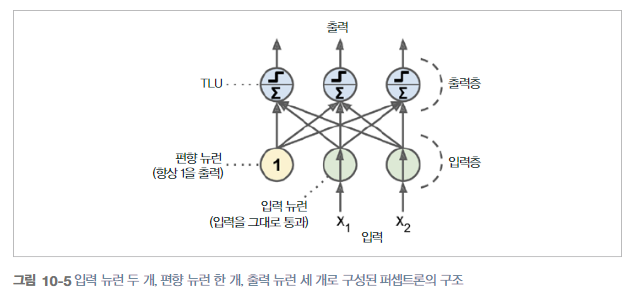

fully-connected layer 에서의 출력 계산은 다음 식을 따른다. 

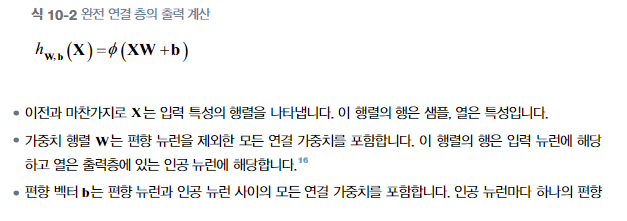

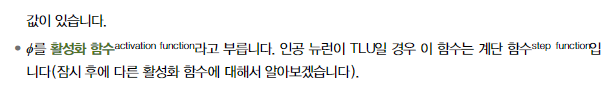

퍼셉트론은 네트워크가 예측할 때 만드는 오차를 반영하도록 조금 변형된 규칙을 사용하여 훈련됩니다.

구체적으로 말하면 퍼셉트론에 한 번에 한 개의 샘플이 주입되면 각 샘플에 대해 예측이 만들어집니다. 잘못된 예측을 하는 모든 출력 뉴런에 대해 올바른 예측을 만들 수 있도록 입력에 연결된 가중치를 강화시킵니다.

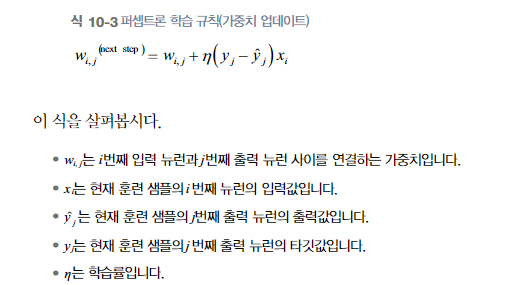

로지스틱 회귀 분류기와 달리 퍼셉트론은 클래스 확률을 제공하지 않으며 고정된 임곗값을 기준으로 예측을 만든다. 이런 이유로 로지스틱 회귀가 선호된다.

퍼셉트론을 여러 개 쌓아올리면 일부 제약을 줄일 수 있다. 이런 신경망을 다층 퍼셉트론이라고 부르며 다층 퍼셉트론은 XOR 문제를 풀 수 있다.

1986년 제프리 힌턴은 역전파 훈련 알고리즘을 소개하는 논문을 공개했다. 이 알고리즘은 효율적인 기법으로 그레디언트를 자동으로 계산하는 경사 하강법이다. 경사 하강법을 통해 오차를 감소시키기 위해 각 연결 가중치와 편향값이 어떻게 바뀌어야 할지 알 수 있게 되었다.

### 역전파는 어떻게 적용되는가?

각 훈련 샘플에 대해 역전파 알고리즘이 먼저 예측을 만들고 (정방향 계산) 오차를 측정 한다. 그런 다음 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정한다.(역방향 계산, chainrule 활용) 마지막으로 이 오차가 감소하도록 가중치를 조정한다.(경사 하강법 단계)

- 은닉층의 연결 가중치를 랜덤하게 초기화하는 것이 중요합니다. 가중치를 랜덤하게 초기화하면 대칭성이 깨지므로 역전파가 전체 뉴런을 다양하게 훈련할 수 있습니다.

### 활성화 함수

활성화 함수는 복잡한 문제를 풀기 위해 도입된 비선형 함수이다. 

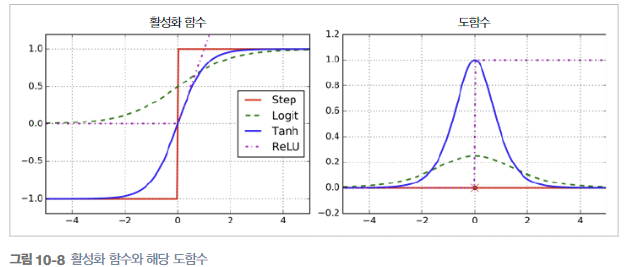

### 회귀용 다층 퍼셉트론

일반적으로 회귀용 다층 퍼셉트론을 만들 때 출력 뉴런에 활성화 함수를 사용하지 않고 어떤 범위의 값도 출력되도록 합니다. 

- 출력이 항상 양수여야 한다면 출력층에 ReLU 활성화 함수를 사용할 수 있습니다.

- 어떤 범위 안의 값을 예측하고 싶다면 로지스틱 함수나 하이퍼볼릭 탄젠트 함수를 사용하고 레이블의 스케일을 적절한 범위로 조정할 수 있습니다.

훈련에 사용하는 손실 함수는 전형적으로 평균제곱 오차(MSE) 입니다. 하지만 훈련 세트에 이상치가 많다면 평균 절댓값 오차(MAE)를 사용할 수 있습니다.

### 다중 분류 문제의 경우

각 샘플이 3개 이상의 클래스 중 한 클래스에만 속할 수 있다면 클래스마다 하나의 출력 뉴런이 필요합니다. 출력층에는 소프트맥스 활성화 함수를 사용해야 합니다.

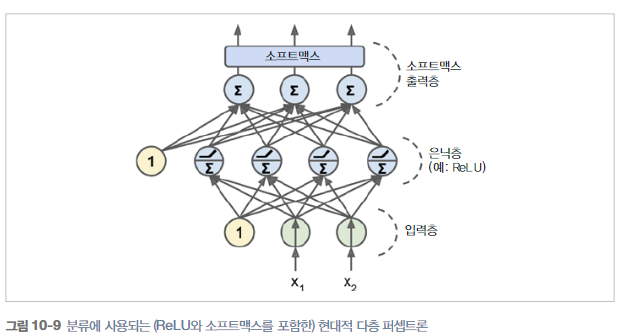

확률 분포를 예측해야 하므로 손실 함수에는 일반적으로 cross_entropy_loss 를 선택하는 것이 좋습니다.


#10.2 케라스로 다층 퍼셉트론 구현하기

### fashion_mnist 분류 문제

In [ ]:
from tensorflow import keras

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
# MNIST 데이터셋 로드(이미 훈련 세트와 테스트 세트로 나누어져 있다.)
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
# validation set 생성 및 전처리
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

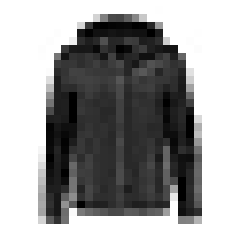

In [ ]:
# 이미지 출력
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# 제시된 클래스 이름은 다음과 같다.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

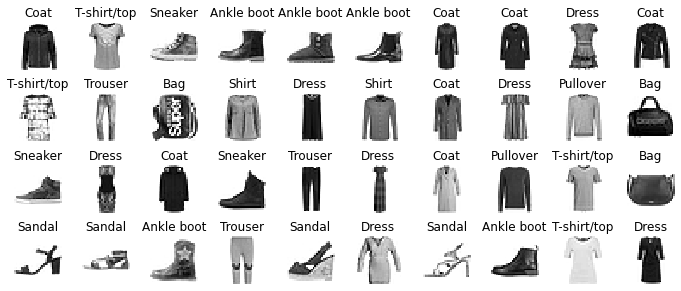

In [ ]:
# 샘플 이미지 몇 개만 출력
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# model 생성
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


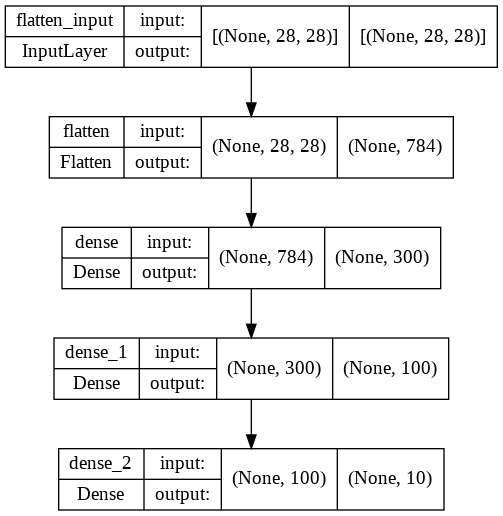

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3145 - accuracy: 0.8872 - val_loss: 0.3301 - val_accuracy: 0.8790
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3077 - accuracy: 0.8888 - val_loss: 0.3219 - val_accuracy: 0.8868
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3007 - accuracy: 0.8916 - val_loss: 0.3873 - val_accuracy: 0.8564
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2947 - accuracy: 0.8941 - val_loss: 0.3175 - val_accuracy: 0.8878
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2901 - accuracy: 0.8953 - val_loss: 0.3104 - val_accuracy: 0.8898
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.8991 - val_loss: 0.3173 - val_accuracy: 0.8878
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2768 - accuracy: 0.9013 - val_loss: 0.3115 - val_accuracy:

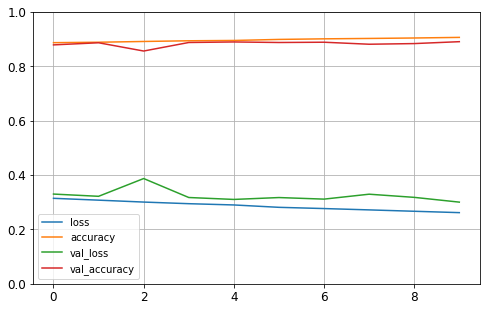

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 회귀 MLP - 캘리포니아 주택 데이터셋

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])

model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics='accuracy')
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid))
mse_test= model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.8737 - accuracy: 0.0025 - val_loss: 0.7688 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6360 - accuracy: 0.0029 - val_loss: 0.6091 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5649 - accuracy: 0.0029 - val_loss: 0.5705 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5354 - accuracy: 0.0029 - val_loss: 0.5174 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.0029 - val_loss: 0.4895 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4965 - accuracy: 0.0029 - val_loss: 0.4710 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4821 - accuracy: 0.0029 - val_loss: 0.4634 - val_accuracy: 0.0044
Epoch 

KeyboardInterrupt: ignored

### Subclassing API

시퀀셜 api 와 함수형 api는 모두 선언적입니다. 사용할 층과 연결 방식을 먼저 정의해야 합니다. 그다음 모델에 데이터를 주입하여 훈련이나 추론을 시작할 수 있습니다.

이 방식에는 장접이 많습니다.

- 모델을 저장하거나 복사, 공유하기가 쉽습니다.

- 모델의 구조를 출력하거나 분석하기 좋으며, 프레임워크가 크기를 짐작하고 타입을 확인하여 에러를 일찍 발견할 수 있습니다.

다만, 반복문을 포함하고 조건문을 가지는 등 여러 가지 동적인 구조를 필요로 한다면 서브클래싱 api 가 적절합니다.

In [ ]:
class WideAndDeepModel(keras.models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
      super().__init__(**kwargs)
      self.hidden1 = keras.layers.Dense(units, activation=activation)
      self.hidden2 = keras.layers.Dense(units, activation=activation)
      self.main_output = keras.layers.Dense(1)
      self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)

    return main_output, aux_output

model = WideAndDeepModel(30, activation='relu')

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10


ValueError: ignored

# 10.3 신경망 하이퍼파라미터 튜닝하기

하이퍼파라미터를 조정하는 한 가지 방법은 많은 하이퍼파라미터 조합을 시도해보고 어떤 것이 검증 세트에서 좋은 점수를 내는지 확인하는 것이다.

- GridSearchCV, RandomizedSearchCV

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
# KerasRegressor 객체는 케라스 모델을 감싸는 간단한 wrapper 이다.
# 일반적인 사이킷런 회귀 추정기처럼 이 객체를 사용할 수 있다.
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0333 - val_loss: 1.3945
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5285 - val_loss: 0.6407
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4734 - val_loss: 0.5118
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4471 - val_loss: 0.4400
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4320 - val_loss: 0.4250
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4216 - val_loss: 0.4660
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4166 - val_loss: 0.4807
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4110 - val_loss: 0.3846
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4065 - val_loss: 0.3838
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4023 - val_lo

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3678


In [ ]:
y_pred = keras_reg.predict(X_new)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8420 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4815 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4519 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4429 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4368 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4340 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4351 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4267 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4258 - val_loss: 0.4040
Epoch 10/100
242/242 [========

KeyboardInterrupt: ignored

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model

가장 좋은 점수를 낸 모델을 저장하고 테스트 세트에서 평가할 수 있다. 

랜덤 탐색을 사용하는 것은 크게 어렵지 않으며 간단한 문제에서 잘 동작하나, 훈련에 시간이 많이 걸리면 탐색할 수 있는 하이퍼파라미터 공간에 제약이 생긴다. 